In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp1
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC

In [48]:
data1=pd.read_csv("diabetes1.csv",delimiter=",")
data1.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes


In [30]:
data1.shape

(390, 16)

In [5]:
np.sum(data1.isnull())

patient_number     0
cholesterol        0
glucose            0
hdl_chol           0
chol_hdl_ratio     0
age                0
gender             0
height             0
weight             0
bmi                0
systolic_bp        0
diastolic_bp       0
waist              0
hip                0
waist_hip_ratio    0
diabetes           0
dtype: int64

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_number   390 non-null    int64  
 1   cholesterol      390 non-null    int64  
 2   glucose          390 non-null    int64  
 3   hdl_chol         390 non-null    int64  
 4   chol_hdl_ratio   390 non-null    float64
 5   age              390 non-null    int64  
 6   gender           390 non-null    object 
 7   height           390 non-null    int64  
 8   weight           390 non-null    int64  
 9   bmi              390 non-null    float64
 10  systolic_bp      390 non-null    int64  
 11  diastolic_bp     390 non-null    int64  
 12  waist            390 non-null    int64  
 13  hip              390 non-null    int64  
 14  waist_hip_ratio  390 non-null    float64
 15  diabetes         390 non-null    object 
dtypes: float64(3), int64(11), object(2)
memory usage: 45.8+ KB


In [49]:
#mengeluarkan data outlier
from scipy import stats
outlier = np.abs(stats.zscore(data1._get_numeric_data()))
print(outlier)
# mendapatkan outlier pada semua variabel (outlier>3 = outlier)
data=data1[(outlier<3).all(axis=1)]
print(data.shape)

[[1.72761533 0.31901328 0.5646553  ... 1.02010483 0.88248912 0.5659952 ]
 [1.71873299 1.37261932 0.52743157 ... 0.84629929 0.52894956 0.70275984]
 [1.70985065 0.21899831 0.60187902 ... 0.3703395  0.35489932 0.117828  ]
 ...
 [1.70985065 2.10203888 0.32270108 ... 1.19391037 0.35217979 1.66011232]
 [1.71873299 0.55525555 1.42681407 ... 0.49868821 0.88248912 0.52812192]
 [1.72761533 0.94669348 0.24825362 ... 2.28220046 1.41551798 1.62223904]]
(355, 16)


In [32]:
data1.describe()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,4.524615,46.774359,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385
std,112.727548,44.666005,53.798188,17.279069,1.736634,16.435911,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212
min,1.000000,78.000000,48.000000,12.000000,1.500000,19.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000
25%,98.250000,179.000000,81.000000,38.000000,3.200000,34.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000
50%,195.500000,203.000000,90.000000,46.000000,4.200000,44.500000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000
75%,292.750000,229.000000,107.750000,59.000000,5.400000,60.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000
max,390.000000,443.000000,385.000000,120.000000,19.300000,92.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000


# Statistik Deskriptif

In [50]:
data=data.drop(['patient_number'], axis=1)
data.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
1,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
2,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
3,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
4,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes


In [51]:
LE=LabelEncoder()
data.diabetes=LE.fit_transform(data.diabetes)
data.gender=LE.fit_transform(data.gender)
data.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,193,77,49,3.9,19,0,61,119,22.5,118,70,32,38,0.84,1
1,146,79,41,3.6,19,0,60,135,26.4,108,58,33,40,0.83,1
2,217,75,54,4.0,20,0,67,187,29.3,110,72,40,45,0.89,1
3,226,97,70,3.2,20,0,64,114,19.6,122,64,31,39,0.79,1
4,164,91,67,2.4,20,0,70,141,20.2,122,86,32,39,0.82,1


In [71]:
data.describe()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
count,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000,355.000000
mean,204.481690,98.653521,50.104225,4.414085,45.940845,0.419718,65.940845,174.723944,28.351831,134.856338,82.783099,37.416901,42.614085,0.878648,0.876056
std,39.787168,35.818531,15.512811,1.453662,16.203487,0.494209,3.898340,37.491353,6.140765,20.442539,13.449455,5.445752,5.352577,0.070750,0.329982
min,78.000000,48.000000,12.000000,1.900000,19.000000,0.000000,55.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000,0.000000
25%,179.000000,80.000000,39.000000,3.200000,33.500000,0.000000,63.000000,147.500000,23.800000,120.000000,74.000000,33.000000,39.000000,0.830000,1.000000
50%,203.000000,88.000000,46.000000,4.100000,43.000000,0.000000,66.000000,170.000000,27.800000,134.000000,82.000000,37.000000,42.000000,0.880000,1.000000
75%,227.000000,103.000000,59.000000,5.300000,59.000000,1.000000,69.000000,197.500000,31.800000,145.000000,90.000000,41.000000,46.000000,0.930000,1.000000
max,337.000000,267.000000,100.000000,9.400000,92.000000,1.000000,76.000000,289.000000,48.400000,200.000000,122.000000,53.000000,59.000000,1.090000,1.000000


In [72]:
summary = data.groupby("diabetes")
summary.mean().reset_index()

,diabetes,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
0,0,217.181818,165.431818,46.045455,5.134091,58.250000,0.409091,65.659091,186.545455,30.495455,145.681818,84.704545,40.250000,44.659091,0.902500
1,1,202.684887,89.205788,50.678457,4.312219,44.199357,0.421222,65.980707,173.051447,28.048553,133.324759,82.511254,37.016077,42.324759,0.875273


# Visualisasi

<AxesSubplot:ylabel='diabetes'>

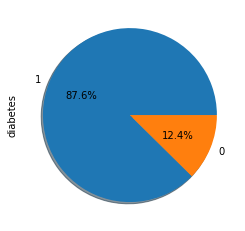

In [12]:
diabetes=data['diabetes'].value_counts()
diabetes.plot.pie(autopct='%1.1f%%',shadow=True)

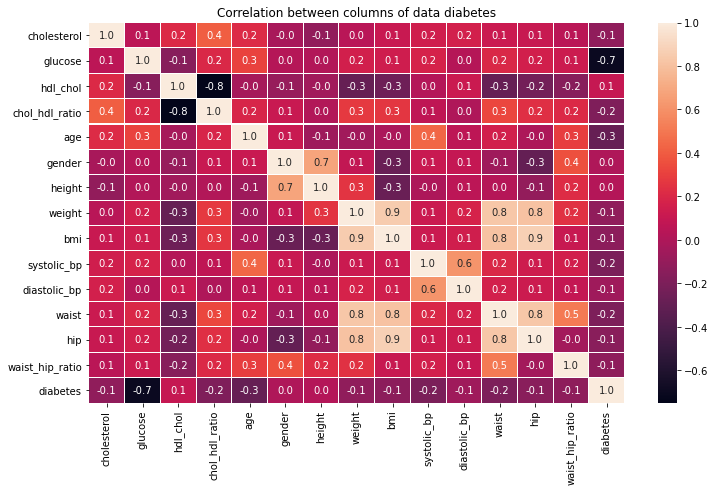

In [13]:
#melihat korelasi
corr=data.corr()
corr
#visualisasi
f,ax=plt.subplots(figsize=(12,7))
sns.heatmap(corr, annot=True, linewidth=0.01, fmt='.1f', ax=ax)
plt.title("Correlation between columns of data diabetes")
plt.show()

<AxesSubplot:title={'center':'glucose'}, xlabel='diabetes'>

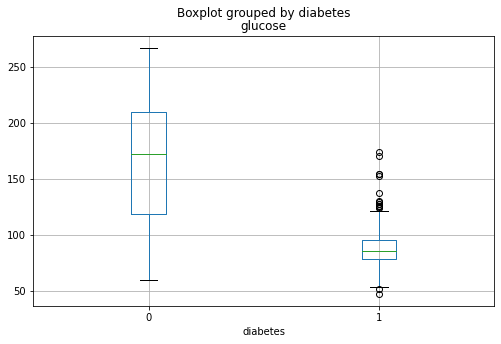

In [14]:
data.boxplot("glucose",by="diabetes",figsize=(8,5))

# MODEL SELECTION

In [52]:
x=data.drop('diabetes', axis=1)
x.tail()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
382,271,121,40,6.8,81,0,64,158,27.1,146,76,36,43,0.84
383,240,88,49,4.9,82,0,63,170,30.1,180,86,41,46,0.89
384,255,112,34,7.5,82,1,66,163,26.3,179,89,37,43,0.86
385,227,105,44,5.2,83,0,59,125,25.2,150,90,35,40,0.88
389,165,94,69,2.4,92,0,62,217,39.7,160,82,51,51,1.00


In [53]:
y=data['diabetes']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diabetes, dtype: int32

In [133]:
#Principal Component Analysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

#Standarization Data
from sklearn.preprocessing import StandardScaler
x_std=StandardScaler().fit_transform(x)

#Calculate Covariance Matrix
cov_mat=np.cov(x_std.T)

#Perform eigen decomposition on covariance matrix
eig_vals, eig_vecs= np.linalg.eig(cov_mat)
print('Eigenvalues \n%s' %eig_vals)
print('Eigenvectors \n%s' %eig_vecs)

Eigenvalues 
[4.08108741e+00 2.26958732e+00 1.84179661e+00 1.57098758e+00
 1.07479110e+00 1.00731729e+00 8.49234257e-01 5.95246030e-01
 3.06562726e-01 2.63315665e-01 1.28602629e-01 4.37199377e-02
 5.23875992e-03 2.06069934e-03]
Eigenvectors 
[[ 1.01111993e-01  7.77362029e-02 -3.22780365e-01 -2.38630443e-01
  -5.92329094e-01 -4.89545918e-01 -2.00035164e-01  6.51196652e-02
   2.38426937e-02  1.10206487e-01 -1.69544354e-03  4.18409287e-01
  -7.25876038e-03 -1.53474614e-03]
 [ 1.50470259e-01  1.50948801e-01 -1.05051816e-01 -2.38750710e-01
   4.78295664e-01  2.04372659e-02 -6.66069134e-01  4.57819018e-01
  -4.10411441e-02  4.11569568e-02  1.57205013e-02  2.11794522e-02
  -5.52943350e-03 -2.38928058e-04]
 [-2.20302896e-01 -8.73514156e-02 -3.75311685e-01  4.02646126e-01
   1.48637734e-02 -4.82449804e-01 -1.55890759e-01  2.75028634e-02
  -4.87938810e-02  2.22623152e-02 -2.72299256e-02 -6.15568917e-01
   1.57945334e-02  4.90293169e-03]
 [ 2.57541865e-01  1.72021189e-01  1.48393462e-01 -5.267148

In [136]:
pca=PCA(n_components=14)
x_pca=pca.fit(x_std).transform(x_std)
print(x_pca)

[[-2.55577908e+00 -1.74543447e+00 -5.93828121e-01 ... -9.99029905e-02
  -8.57778357e-02 -1.34164588e-02]
 [-2.10526327e+00 -2.53973791e+00 -1.71456847e+00 ... -3.89162494e-02
  -3.33288111e-02  1.62575678e-02]
 [ 4.34676584e-02 -1.53689103e+00 -1.28089242e+00 ... -1.21065223e-01
   9.51280505e-04  3.50456819e-03]
 ...
 [ 1.18218973e+00  2.54570925e+00  1.54920549e+00 ...  2.48011781e-01
  -4.33316163e-02  6.66035866e-03]
 [-4.85685327e-01  2.58862706e-01  2.34027926e+00 ... -1.36189642e-01
  -1.09403476e-01  2.97328636e-02]
 [ 3.14306291e+00 -4.36894410e-01  2.05686736e+00 ...  2.91689920e-01
   7.35411536e-02 -1.63806619e-01]]


[4.08108741e+00 2.26958732e+00 1.84179661e+00 1.57098758e+00
 1.07479110e+00 1.00731729e+00 8.49234257e-01 5.95246030e-01
 3.06562726e-01 2.63315665e-01 1.28602629e-01 4.37199377e-02
 5.23875992e-03 2.06069934e-03]


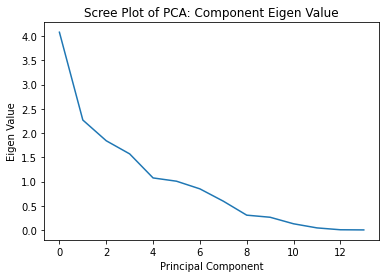

In [137]:
#print scree ploot
eigen_val=pca.explained_variance_
plt.xlabel('Principal Component')
plt.ylabel('Eigen Value')
plt.title('Scree Plot of PCA: Component Eigen Value')
plt.plot(eigen_val)
print(eigen_val)

[ 29.07  45.24  58.36  69.55  77.21  84.38  90.43  94.67  96.85  98.73
  99.65  99.96 100.   100.01]


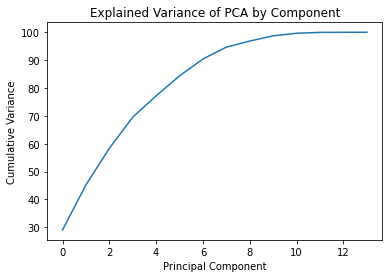

In [138]:
#cumulative variance explains (proportion)
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance')
plt.title('Explained Variance of PCA by Component')
plt.plot(var1)
print(var1)

In [139]:
#calculate eigen using Sklearn (As Performed Above)
pca=PCA(n_components=6)
x_pca=pca.fit(x_std).transform(x_std)
print(x_pca)

[[-2.55577908 -1.74543447 -0.59382812 -0.81184592 -0.2861758  -0.23663039]
 [-2.10526327 -2.53973791 -1.71456847 -0.8143872   0.73255084 -0.46444753]
 [ 0.04346766 -1.53689103 -1.28089242  0.60135371 -0.64193146  0.99777936]
 ...
 [ 1.18218973  2.54570925  1.54920549 -2.13589812 -0.85432692 -0.89810629]
 [-0.48568533  0.25886271  2.34027926 -2.3362778   0.53230769 -0.3452926 ]
 [ 3.14306291 -0.43689441  2.05686736  1.24489043  2.96798643  1.45343469]]


In [140]:
#concate new features with target
feature1=pd.DataFrame(x_pca)
feature1.columns=['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6']
new_data=pd.concat([feature1, y], axis=1)
new_data.head()

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,diabetes
0,-2.555779,-1.745434,-0.593828,-0.811846,-0.286176,-0.236630,1.0
1,-2.105263,-2.539738,-1.714568,-0.814387,0.732551,-0.464448,1.0
2,0.043468,-1.536891,-1.280892,0.601354,-0.641931,0.997779,1.0
3,-3.227135,-1.671331,0.058947,-0.302618,-0.443507,0.701785,1.0
4,-2.793502,-0.836651,-0.429165,1.577037,0.089615,-0.493344,1.0


In [141]:
#Examining the component loadings or components
PC=pca.components_
PC_trans=PC.transpose()
results=pd.DataFrame(PC_trans)
results.columns=['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6']
results

,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6
0,0.101112,0.077736,0.322780,-0.238630,-0.592329,0.489546
1,0.150470,0.150949,0.105052,-0.238751,0.478296,-0.020437
2,-0.220303,-0.087351,0.375312,0.402646,0.014864,0.482450
3,0.257542,0.172021,-0.148393,-0.526715,-0.373267,-0.128342
4,0.094193,0.297493,0.340500,-0.294439,0.346482,0.165290
5,-0.026317,0.539208,-0.227421,0.180426,-0.113261,0.036572
6,-0.002525,0.423023,-0.327960,0.342604,-0.117499,0.024733
7,0.437068,-0.024943,-0.164661,0.265460,-0.042504,0.049056
8,0.435979,-0.254410,0.019311,0.084838,0.016274,0.036115
9,0.147321,0.265069,0.490532,0.097318,0.033559,-0.380659


# HOLD UP (Gaussian Naive Bayes)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=123)

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[ 8,  2],
       [ 7, 90]], dtype=int64)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.80      0.64        10
           1       0.98      0.93      0.95        97

    accuracy                           0.92       107
   macro avg       0.76      0.86      0.80       107
weighted avg       0.94      0.92      0.92       107



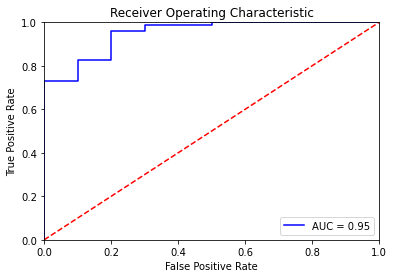

In [13]:
import sklearn.metrics as metrics
probs = gnb.predict_proba(x_test) #probabilitas klasifikasi
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc =  metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--') #garis linier merah
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Hold Up (SVM Linier)

In [55]:
#linear kernel
clf=svm.SVC(kernel='linear')
#train the model using the training sets
clf.fit(x_train, y_train)
#predict  the response for the dataset
y_pred=clf.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 5  5]
 [ 0 97]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67        10
           1       0.95      1.00      0.97        97

    accuracy                           0.95       107
   macro avg       0.98      0.75      0.82       107
weighted avg       0.96      0.95      0.95       107



[0.  0.  0.  0.1 0.1 0.3 0.3 0.5 0.5 1. ]
[0.         0.01030928 0.80412371 0.80412371 0.96907216 0.96907216
 0.98969072 0.98969072 1.         1.        ]
[ 4.15675077  3.15675077  1.46059162  1.46043872  1.02482203  0.76727549
  0.50438788  0.29302437  0.14166598 -2.61699683]


<Figure size 432x288 with 0 Axes>

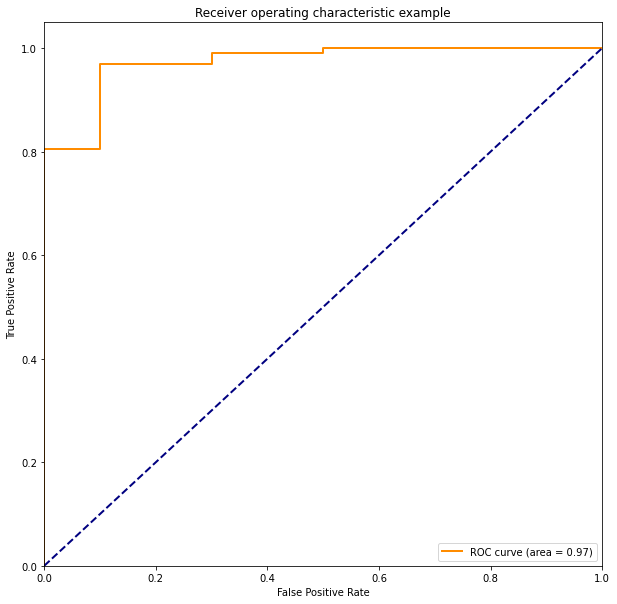

In [56]:
# Learn to predict each class against the other classifier settings
svm=svm.SVC(kernel='linear', probability=True,random_state=np.random.RandomState(0))
#Use the kernel function as the linear kernel, the parameters are defaulted, and the classifier is created
 
###The value of test_predict_label calculated by decision_function(), used in roc_curve() function
y_pred = svm.fit(x_train, y_train).decision_function(x_test)
 #First use fit to train the training samples and training sample labels to obtain the model, and then use decision_function to obtain the label set predicted by the model for the test sample set

# Compute ROC curve and ROC area for each class#Calculate tp,fp
#By comparing the label set input by the test sample and the label set predicted by the model, fp, tp, different fp, tp are obtained by the algorithm by changing the threshold through certain rules
fpr,tpr,threshold = metrics.roc_curve(y_test, y_pred) 
###Calculate the true rate and false positive rate
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr,tpr) ###Calculate the value of auc, auc is the area surrounded by the curve, the bigger the better
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
                   lw=lw, label='ROC curve (area = %0.2f)'% roc_auc) ###The false positive rate is the abscissa, the true rate is the ordinate to make the curve
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Startified Hold Up (Gaussian)

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.3,random_state=123)

In [150]:
gnb= GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [151]:
confusion_matrix(y_test, y_pred)

array([[11,  2],
       [ 5, 89]], dtype=int64)

In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.98      0.95      0.96        94

    accuracy                           0.93       107
   macro avg       0.83      0.90      0.86       107
weighted avg       0.94      0.93      0.94       107



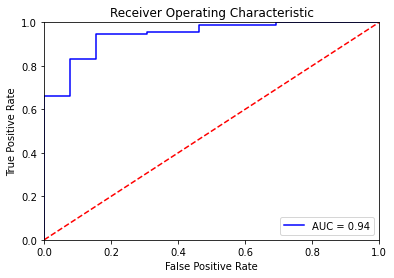

In [153]:
import sklearn.metrics as metrics
probs = gnb.predict_proba(x_test) #probabilitas klasifikasi
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc =  metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--') #garis linier merah
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Startified Hold Up (Radial Bebas)

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.3,random_state=123)

In [54]:
#polinomial kernel
clfrbf=svm.SVC(kernel='rbf')

#train the model using the training sets
clfrbf.fit(x_train, y_train)

#predict the response for test dataset
y_predrbf=clfrbf.predict(x_test)

In [55]:
# from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_predrbf))
print(classification_report(y_test,y_predrbf))

[[ 3 10]
 [ 1 93]]
              precision    recall  f1-score   support

           0       0.75      0.23      0.35        13
           1       0.90      0.99      0.94        94

    accuracy                           0.90       107
   macro avg       0.83      0.61      0.65       107
weighted avg       0.88      0.90      0.87       107



# Stratified Hold Up (SVM Linier)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.3,random_state=123)

In [63]:
#linear kernel
clf=svm.SVC(kernel='linear')
#train the model using the training sets
clf.fit(x_train, y_train)
#predict  the response for the dataset
y_pred=clf.predict(x_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8  5]
 [ 1 93]]
              precision    recall  f1-score   support

           0       0.89      0.62      0.73        13
           1       0.95      0.99      0.97        94

    accuracy                           0.94       107
   macro avg       0.92      0.80      0.85       107
weighted avg       0.94      0.94      0.94       107



[0.         0.         0.         0.07692308 0.07692308 0.15384615
 0.15384615 0.23076923 0.23076923 0.30769231 0.30769231 0.38461538
 0.38461538 0.53846154 0.53846154 1.        ]
[0.         0.0106383  0.25531915 0.25531915 0.77659574 0.77659574
 0.82978723 0.82978723 0.91489362 0.91489362 0.95744681 0.95744681
 0.9893617  0.9893617  1.         1.        ]
[ 4.54496552  3.54496552  2.5600404   2.55283329  1.31819504  1.29699111
  1.11597945  1.07858594  0.71276536  0.63214747  0.27536523  0.14428249
  0.01660458 -0.17522455 -0.35469984 -1.71635046]


<Figure size 432x288 with 0 Axes>

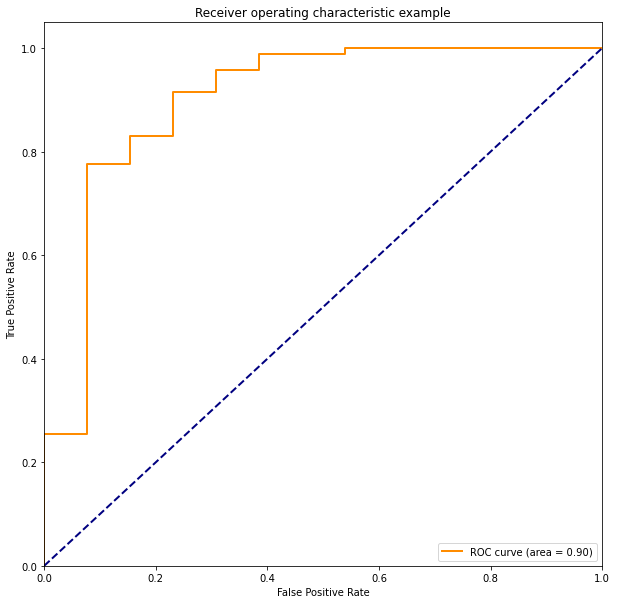

In [65]:
# Learn to predict each class against the other classifier settings
svm=svm.SVC(kernel='linear', probability=True,random_state=np.random.RandomState(0))
#Use the kernel function as the linear kernel, the parameters are defaulted, and the classifier is created
 
###The value of test_predict_label calculated by decision_function(), used in roc_curve() function
y_pred = svm.fit(x_train, y_train).decision_function(x_test)
 #First use fit to train the training samples and training sample labels to obtain the model, and then use decision_function to obtain the label set predicted by the model for the test sample set

# Compute ROC curve and ROC area for each class#Calculate tp,fp
#By comparing the label set input by the test sample and the label set predicted by the model, fp, tp, different fp, tp are obtained by the algorithm by changing the threshold through certain rules
fpr,tpr,threshold = metrics.roc_curve(y_test, y_pred) 
###Calculate the true rate and false positive rate
print(fpr)
print(tpr)
print(threshold)
roc_auc = metrics.auc(fpr,tpr) ###Calculate the value of auc, auc is the area surrounded by the curve, the bigger the better
 
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
                   lw=lw, label='ROC curve (area = %0.2f)'% roc_auc) ###The false positive rate is the abscissa, the true rate is the ordinate to make the curve
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Stratified Hold Up (SVM Polinomial Berderajat 3)

In [61]:
#polinomial kernel
clfpoly=svm.SVC(kernel='poly', degree=3)

#train the model using the training sets
clfpoly.fit(x_train, y_train)

#predict the response for test dataset
y_predpoly=clfpoly.predict(x_test)

In [62]:
# from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_predpoly))
print(classification_report(y_test,y_predpoly))

[[ 5  8]
 [ 3 91]]
              precision    recall  f1-score   support

           0       0.62      0.38      0.48        13
           1       0.92      0.97      0.94        94

    accuracy                           0.90       107
   macro avg       0.77      0.68      0.71       107
weighted avg       0.88      0.90      0.89       107



# Cross Validation

In [56]:
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=5)
model_kfold = GaussianNB()
results_kfold = model_selection.cross_val_score(model_kfold, x, y, cv=kfold)
results_kfold

array([0.98591549, 0.97183099, 0.97183099, 0.84507042, 0.76056338])

In [57]:
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 90.70%


# Stratified Cross Validation

In [58]:
from sklearn.model_selection import StratifiedKFold
kfold_Stra = StratifiedKFold(n_splits=5,random_state=123)
model_kfold = GaussianNB()
results_kfold_Stra = model_selection.cross_val_score(model_kfold, x, y, cv=kfold_Stra)
results_kfold_Stra

C:\Users\WINDOWS8.1\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


array([0.91549296, 0.97183099, 0.88732394, 0.94366197, 0.53521127])

In [59]:
print("Accuracy: %.2f%%" % (results_kfold_Stra.mean()*100.0))

Accuracy: 85.07%


# Repeated Cross Validation

In [60]:
from sklearn.model_selection import RepeatedKFold
rkfold = RepeatedKFold(n_splits=5,n_repeats=5,random_state=123)
results_rkfold = model_selection.cross_val_score(GaussianNB(), x, y, cv=rkfold)
results_rkfold

array([0.92957746, 0.91549296, 0.84507042, 0.94366197, 0.91549296,
       0.92957746, 0.95774648, 0.87323944, 0.91549296, 0.90140845,
       0.88732394, 0.91549296, 0.91549296, 0.92957746, 0.92957746,
       0.90140845, 0.94366197, 0.88732394, 0.97183099, 0.90140845,
       0.94366197, 0.91549296, 0.91549296, 0.90140845, 0.90140845])

In [61]:
print("Accuracy: %.2f%%" % (results_rkfold.mean()*100.0))

Accuracy: 91.55%


In [ ]:
import sklearn.metrics as metrics
probs = gnb.predict_proba(x_test) #probabilitas klasifikasi
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc =  metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], 'r--') #garis linier merah
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()